<a href="https://colab.research.google.com/github/dobrotvorn/DataCon23/blob/main/Mini_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

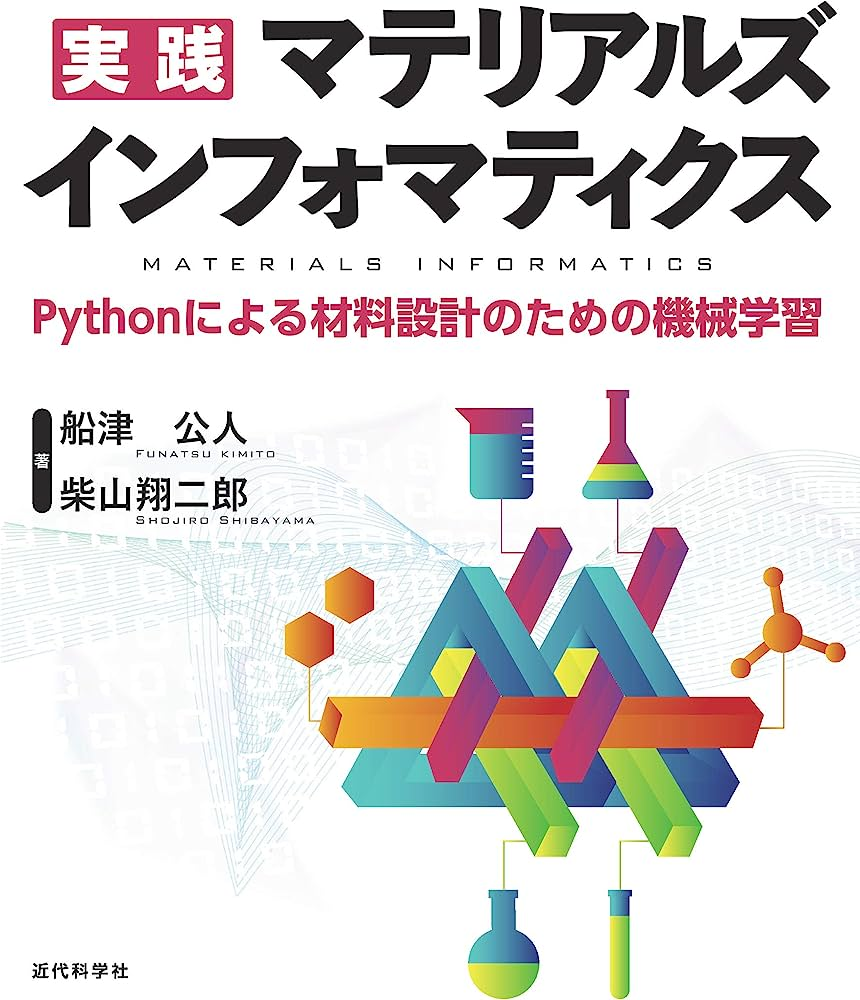




# **Описание задания**

Часть 1: Необходимо заполнить датасет. Следует вписать физико-химические характеристики атома металла, используя библиотеку pymatgen.

Часть 2: Даны SDF-файлы 3D структур молекул и TXT-файл с описательными характеристиками. Необходимо создать функцию, которая принимает на вход SDF-файл и массив названий дескрипторов (характеристик), и  возвращает массив значений указанных дескрипторов. Дано - 15 файлов SDF, собрать из них датасет содержащий их SMILES и указанные дескрипторы (из файла txt). Для выполнения задания требуется библиотека rdkit.

Описание:

material type, nanoparticle - химическая формула

elements - некислородный элемент входящий в состав (причина - большинство материалов оксиды и металлы). В случае неоксидного материала (MxOy, где М-металл, О-кислород, х и у - индексы) берём характеристики первого элемента.

average electronegativity - средняя электроотрицательность по Полингу

ionic radius - ионный радиус elements (исходя из степени окисления; если смесь степеней - среднее значение)

molecular weight - молекулярная масса элемента






## Загрузка данных и библиотек

###Импортируем и скачиваем библиотеки

In [5]:
!pip install pymatgen
!pip install rdkit
import pandas as pd
import numpy as np
import gdown
import pymatgen.core as mg
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from zipfile import ZipFile
import sys

In [6]:

# тут захардкодим статичные переменные
global path1DB
global path2zip
global path2txt
global numerics
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
path1DB = '/content/data_base1.csv' if 'google.colab' in sys.modules else 'data_base1.csv'
path2zip = '/content/sdf_zip.zip' if 'google.colab' in sys.modules else 'sdf_zip.zip'
path2txt = '/content/descript.txt' if 'google.colab' in sys.modules else 'descript.txt'

### Скачиваем данные

In [14]:
# Часть 1
url1_csv = 'https://drive.google.com/u/0/uc?id=1-FfZOicUH3M3i287b2TUefn8VECEzVwR'
output1_csv = 'data_base1.csv'
# Часть 2
url_zip = 'https://drive.google.com/u/0/uc?id=1I4yX-QNKmQ3ARTQ4Svb79q50BG3ESS7T'
utl_txt = 'https://drive.google.com/u/0/uc?id=1-LIltQ-9DYl5fKwm0qxuz5PMkIdJd89G'
output2_zip = 'sdf_zip.zip'
output3_txt = 'descript.txt'
gdown.download(url1_csv, output1_csv, quiet=True)
gdown.download(url_zip, output2_zip, quiet=True)
gdown.download(utl_txt, output3_txt, quiet=True)

'descript.txt'

## **Часть 1: pymatgen**

In [15]:
df_path1 = pd.read_csv('data_base1.csv')
df_path1.head()

,Unnamed: 0,Material,Element,Ionic Radius,Average Electronegativity,Molecular weight
0,0,CuO,NaN,NaN,NaN,NaN
1,1,ZnO,NaN,NaN,NaN,NaN
2,4,Mn2O3,NaN,NaN,NaN,NaN
3,8,CoO,NaN,NaN,NaN,NaN
4,80,CeO2,NaN,NaN,NaN,NaN


## **Часть 2: RDKit**

In [19]:
with open('descript.txt', 'r') as file:
    desc = [mol.replace('\n', '') for mol in file]
print(desc)


['Chi0n', 'Chi0v', 'EState_VSA9', 'ExactMolWt', 'FpDensityMorgan1', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumValenceElectrons', 'PEOE_VSA1', 'PEOE_VSA9', 'RingCount', 'SMR_VSA1', 'SlogP_VSA2', 'TPSA', 'VSA_EState1']
